# Regression MSA Part 2



# Explaining the variables
Work_year: This feature refers to the number of years an individual has been in the workforce. It is a numeric variable.

experience_level: This categorical variable indicates the experience level of the individual. This gives an idea about the expertise and seniority of the individual in their field.

employment_type: This is a categorical variable that describes the type of employment the individual holds and it is categorical.

job_title: This is a categorical text-based variable that holds the title of the job the individual is performing which is also categorical.

salary: This is a continuous numeric variable that indicates the salary earned by the individual. 

salary_currency: This is a categorical variable that represents the currency in which the salary is paid. This could be 'USD', 'EUR', 'GBP', etc.

salary_in_usd: This is a continuous numeric variable that represents the salary of the individual in USD. It is calculated based on the original salary and the exchange rate from the salary currency to USD.

employee_residence: This is a categorical variable that indicates the country where the employee lives.

remote_ratio: This is a continuous variable either 100 or 0.

company_location: This is a categorical variable indicating the location country of the company where the individual is employed.

company_size: This is a categorical variable indicating the size of the company. 

These are all the features that are given to me for me to find my target which is 'salary_in_usd' feature as this feature is something that does not need any convert (ie converting currencies).

## Importing libaries and removing outliers

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score, accuracy_score
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingClassifier
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer

df_salaries = pd.read_csv('data_salaries.csv')

# Function to remove outliers
def remove_outliers(df):
    numeric_cols = df.select_dtypes(include=[np.number])
    mean = numeric_cols.mean()
    std = numeric_cols.std()
    is_outlier = (np.abs(numeric_cols - mean) > 3 * std).any(axis=1)
    return df[~is_outlier]

df_salaries = remove_outliers(df_salaries)

## setting and spliting the data

In [ ]:
df_encoded_residence = pd.get_dummies(df_salaries['employee_residence'])
df_encoded_job_title = pd.get_dummies(df_salaries['job_title'])

# Drop the original 'employee_residence', 'job_title', and 'Profession' columns
df_salaries = df_salaries.drop(columns=['employee_residence', 'job_title'])

# Join the encoded data frame with the original ones
df_salaries = df_salaries.join(df_encoded_residence)
df_salaries = df_salaries.join(df_encoded_job_title)

# Convert ordinal variables to numerical
df_salaries['company_size'] = df_salaries['company_size'].map({'S': 0, 'M': 1,'L':2})
df_salaries['experience_level'] = df_salaries['experience_level'].map({'SE': 0, 'MI':1,'EN':2,'EX':3})
df_salaries['employment_type'] = df_salaries['employment_type'].map({'FT': 0, 'CT':1,'FL':2,'PT':3})

# Define the features and target for the model
X = df_salaries.drop(columns=['salary_in_usd','salary_currency','company_location','work_year'])
y = df_salaries['salary_in_usd']

One-Hot Encoding: 'employee_residence' and 'job_title' are converted into binary (0/1) columns for each category.
Dropping and Joining Columns: The original columns are dropped, and the new binary columns are added to the dataframe.
Ordinal to Numeric Conversion: 'company_size', 'experience_level', and 'employment_type' are converted from categories to numeric values for easier processing by the model.
Defining Features and Target: Features (X) and target (y, which is 'salary_in_usd') for the model are defined.
Data Splitting: The dataset is split into a 70% training set and a 30% test set. The 'random_state' parameter ensures reproducibility of the split.

The model I chose was RandomForestRegressor and it works by creating multiple decision trees from the training data using bootstrapping and random feature selection. Each tree in the forest generates a prediction for a given input, and the final prediction is the average of all trees' predictions. This method reduces overfitting and can handle mixed feature types and missing data, but may be computationally intensive.


In [ ]:
# Split the dataset into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Train the model
rf = RandomForestRegressor(n_estimators=100, random_state=777)
rf.fit(X_train, y_train)

# Make predictions
y_pred = rf.predict(X_test)

# Print the Root Mean Squared Error
print("Root Mean Squared Error: ", np.sqrt(mean_squared_error(y_test, y_pred)))
min_salary = df_salaries['salary_in_usd'].min()
max_salary = df_salaries['salary_in_usd'].max()

print("Minimum salary: ", min_salary)
print("Maximum salary: ", max_salary)

# Calculate the Mean Absolute Error
mae = mean_absolute_error(y_test, y_pred)
print("Mean Absolute Error: ", mae)

# Calculate R-squared
r2 = r2_score(y_test, y_pred)
print("R-squared: ", r2)

# define a range of seeds
seeds = range(10)

mae_values = []
r2_values = []

# loop over the seeds
for seed in seeds:

    # Split the dataset into training and test sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=seed)

    # Train the model
    rf = RandomForestRegressor(n_estimators=100, random_state=777)
    rf.fit(X_train, y_train)


    # Make predictions
    y_pred = rf.predict(X_test)

    # Calculate the Mean Absolute Error and R2 score
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # append the scores to their respective lists
    mae_values.append(mae)
    r2_values.append(r2*1000)

    # plot the results
plt.plot(seeds, mae_values, label='Mean Absolute Error')
plt.plot(seeds, r2_values, label='R-squared')
plt.xlabel('Seed')
plt.ylabel('Value')

for i, txt in enumerate(mae_values):
    plt.text(seeds[i], mae_values[i], f'{txt:.2f}', ha='center')

for i, txt in enumerate(r2_values):
    plt.text(seeds[i], r2_values[i], f'{txt:.2f}', ha='center')

plt.legend()
plt.title('The difference between the Root Mean Error and the R-squared over 10 seeds')
plt.show()


Data Splitting: I began by dividing the data into training and test sets for my salary prediction project.

Model Training: I chose to use the RandomForestRegressor model for this regression task. The RandomForestRegressor is an ensemble learning method based on decision trees that can handle both numerical and categorical features.

Prediction: After training the model on the training data, I made predictions on the test data to assess how well the model generalizes to unseen data.

Evaluation: To measure the model's performance, I calculated several key metrics, including the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R2) I ran the code with 10 random seeds to produce a pattern showing the difference over the seeds, proving that the model was not just fitted for that one group. I also times the numbers by 1000 to see the difference more clearly, as it was to small to visualise the numbers without it.
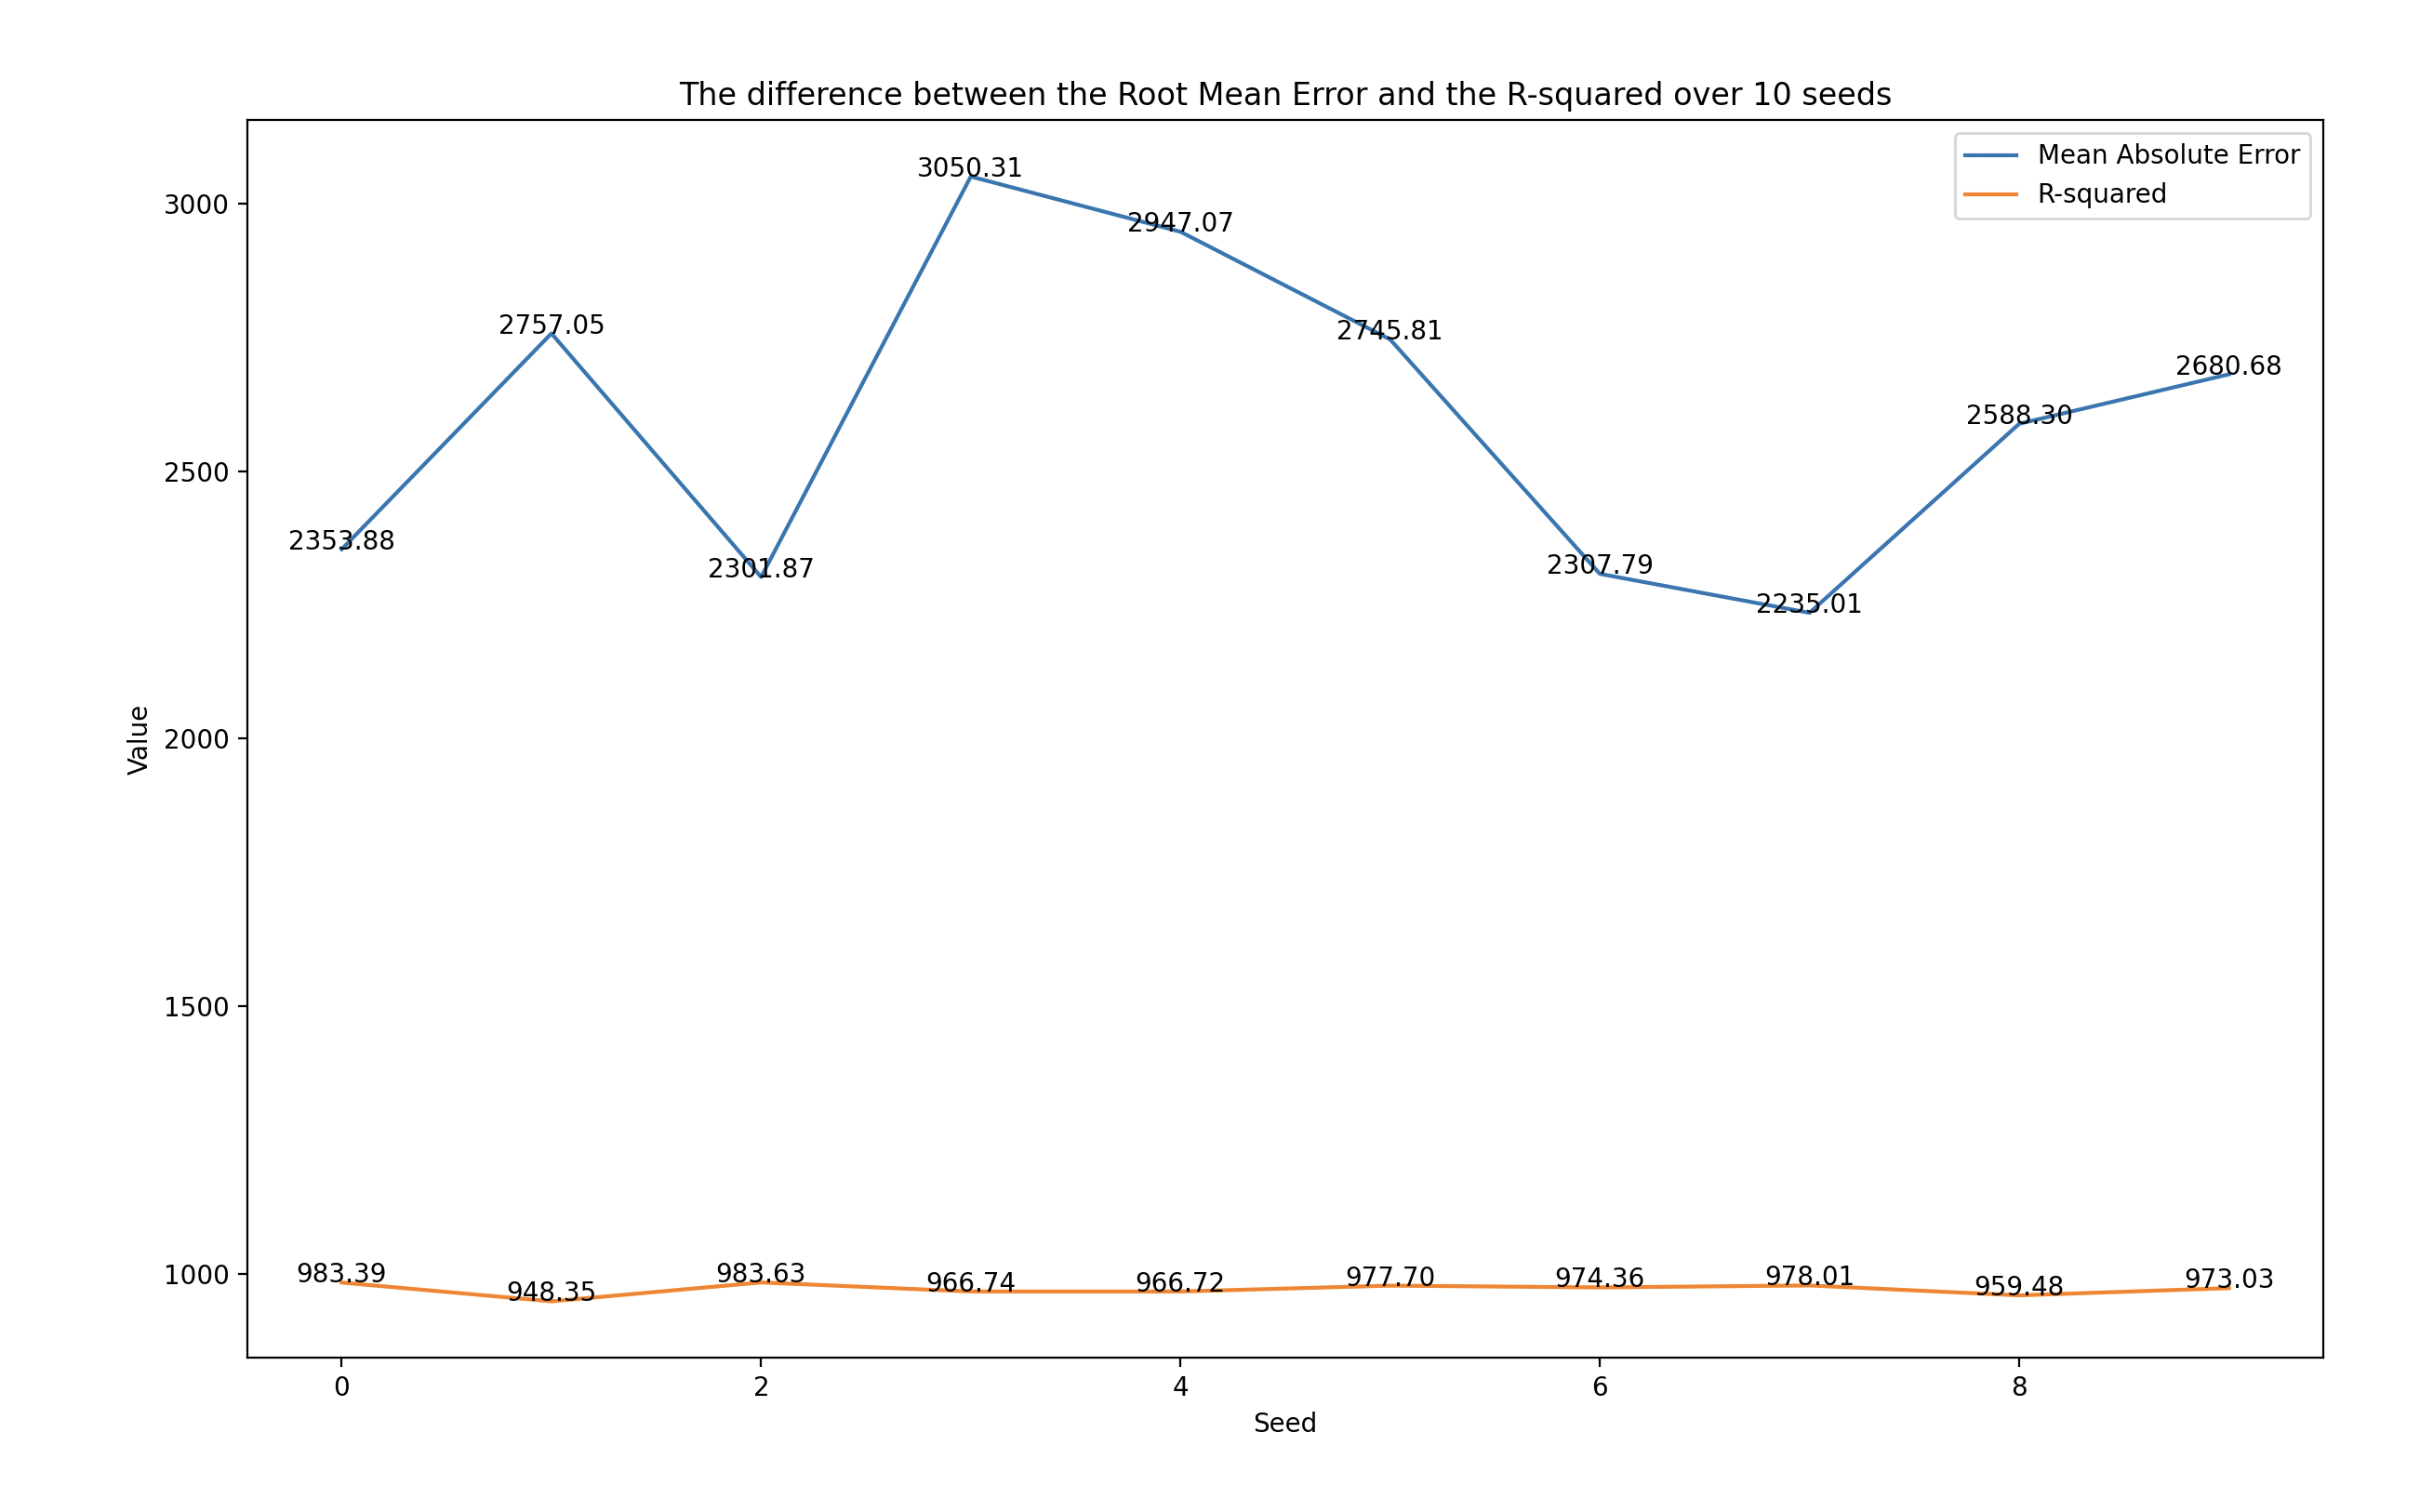

- The RMSE value of 1546 indicates that, on average, my model's predictions were about $1546 away from the actual salary values. RMSE is a measure of how spread out the residuals (the differences between predicted and actual values) are. A lower RMSE indicates better model performance.

- The R-squared (R2) score of 0.97 suggests that approximately 97% of the variation in salary could be explained by the features in the model. R2 is a measure of how well the model fits the data; higher values indicate a better fit.

Seed Variation: To ensure the stability of the model's performance, I conducted a seed variation analysis. By changing the random seed for data splitting, I observed and plotted the changes in the model's performance metrics. This analysis showed that the model's performance remained consistent across different train-test splits, indicating its robustness.

Understanding RMSE: The Root Mean Squared Error is a commonly used metric in regression analysis. It calculates the square root of the average of the squared differences between the predicted and actual values. By squaring the differences, negative and positive errors do not cancel each other out, and larger errors are given more weight. The RMSE value provides a measure of how well the model's predictions align with the actual data and serves as an essential tool for assessing model accuracy. It had a range from 2301-3050, which is very low as the range of earnings is 5132-324000.

Overall, the combination of model training, evaluation, and seed variation analysis has provided valuable insights into the performance and robustness of my salary prediction model, helping me make informed decisions about its suitability for real-world applications.

# Summary 
In this project, the objective was to predict salary in USD based on various job-related features using the RandomForestRegressor model. First, the data was preprocessed by performing one-hot encoding for categorical variables like 'employee_residence' and 'job_title', converting ordinal variables such as 'company_size', 'experience_level', and 'employment_type' to numeric values, and defining features and target for the model. The preprocessed data was then split into a 70% training set and a 30% test set.

A RandomForestRegressor model was trained on the training data using 100 estimators. The model was then used to make predictions on the test data, and its performance was evaluated using metrics such as the Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (R2). The RMSE value of 1546 indicates that the model's predictions were, on average, about $1546 away from the actual values. The R2 score of 0.97 implies that 97% of the variation in the target variable could be explained by the features, demonstrating good model performance.

Furthermore, to test the stability of the model's performance, a seed variation analysis was conducted. The random seed for data splitting was varied, and the changes in the model's performance metrics were observed and plotted. This analysis showed the model's robustness to different training and test set configurations.

Additionally, feature importances from the RandomForestRegressor model were analysed to gain deeper insights into the factors influencing salary predictions. This analysis offered valuable information to job seekers and recruiters, highlighting which job-related features had the most significant impact on salary outcomes for data science roles. Moreover, exploring other machine learning algorithms or fine-tuning model parameters might present opportunities for further enhancing the predictive performance of the salary prediction model.

Examining the feature importances in the RandomForestRegressor could provide additional insights. This can shed light on which features are most influential in predicting salary, potentially informing job seekers or recruiters about the most significant factors affecting salary in data science roles. The feature importances can be accessed through the feature_importances_ attribute of the trained model. Further tuning of the model parameters or trying other machine learning algorithms could also potentially improve the model's performance.
